In [42]:
import torchvision as tv
import torchvision.transforms as transforms
from torchvision.transforms import ToPILImage
show = ToPILImage() # 可以把Tensor转成Image，方便可视化

In [44]:
# 第一次运行程序torchvision会自动下载CIFAR-10数据集，
# 大约100M，需花费一定的时间，
# 如果已经下载有CIFAR-10，可通过root参数指定

# 定义对数据的预处理
transform = transforms.Compose([
        transforms.ToTensor(), # 转为Tensor
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)), # 归一化
                             ])

# 训练集
trainset = tv.datasets.CIFAR10(
                    root='/Users/captain/Downloads/cifar-10-batches-py',
                    train=True, 
                    download=True,
                    transform=transform)

trainloader = t.utils.data.DataLoader(
                    trainset, 
                    batch_size=4,
                    shuffle=True, 
                    num_workers=2)

# 测试集
testset = tv.datasets.CIFAR10(
                    '/Users/captain/Downloads/cifar-10-batches-py',
                    train=False, 
                    download=True, 
                    transform=transform)

testloader = t.utils.data.DataLoader(
                    testset,
                    batch_size=4, 
                    shuffle=False,
                    num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Extracting /Users/captain/Downloads/cifar-10-batches-py/cifar-10-python.tar.gz to /Users/captain/Downloads/cifar-10-batches-py
Files already downloaded and verified


Dataset对象是一个数据集，可以按下标访问，返回形如(data, label)的数据。

cat


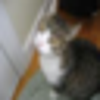

In [48]:
(data, label) = trainset[101]
print(classes[label])

# (data + 1) / 2是为了还原被归一化的数据
show((data + 1) / 2).resize((100, 100))

Dataloader是一个可迭代的对象，它将dataset返回的每一条数据拼接成一个batch，并提供多线程加速优化和数据打乱等操作。当程序对dataset的所有数据遍历完一遍之后，相应的对Dataloader也完成了一次迭代。

1
2


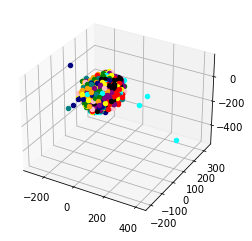

2


PCA()

In [93]:
import torch
from torch.utils.data import DataLoader
import torchvision.datasets as data
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
# 颜色设置
color = ['yellow','black','aqua','green','teal','orange','navy','pink','purple','red']
# 绘图
def show(v2,y):
    for i in range(len(v2)):
        plt.scatter(v2[i][0],v2[i][1],color=color[y[i]])
    plt.show()
def show3d(v3,y):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    for i in range(len(v3)):
        ax.scatter(v3[i][0],v3[i][1],v3[i][2],color=color[y[i]])
    plt.show()
 
trans = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=0, std=1)
])
# mnist = data.MNIST('../mnist',train=True,download=False, transform=trans)
# loader_train = DataLoader(mnist, batch_size=200, shuffle=True) # 可视化1000个点

loader_train = DataLoader(trainset, batch_size=1000, shuffle=True)

##PCA pytorch
# for (x,y) in loader_train:
#     x = torch.squeeze(x,3) # 
#     # x = x.flatten(start_dim=2,end_dim=-1) 
 
#     print(x.shape)
#     # pca
#     v3 = []
#     for i in range(len(x)):
#         v3.append(torch.pca_lowrank(x[i],q=3)[1].numpy()) # 3维
#     v2 = []
#     for i in range(len(x)):
#         v2.append(torch.pca_lowrank(x[i],q=2)[1].numpy()) # 2维
#     print(v2)
#     # 画图
#     show(v2,y)
#     show3d(v3,y)
#     break
i=0
from sklearn.manifold import TSNE
 
for (x,y) in loader_train:
    # x = torch.squeeze(x) # 
    i=i+1
    x = x.flatten(start_dim=1,end_dim=-1) #
    x = torch.squeeze(x) # 
    ##print(x.shape)
    # pca
#     pca2 = decomposition.PCA(2)
#     pca3 = decomposition.PCA(3)
    #tsne
#     tsne2 = TSNE(2)
    tsne3 = TSNE(3)
    # 3维
#     v3 = []
#     pca3.fit(x)  #
#     temp = pca3.fit_transform(x)
#     v3.append(temp) # 
    ##print(len(v3[0]))
    # 2维
#     v2 = []
#     pca2.fit(x)
#     print('ssss',pca2.explained_variance_ratio_) 
#     v2.append(pca2.fit_transform(x)) #
    #tsne
#     v2t = []
#     tsne2.fit(x)
#     output = tsne2.fit_transform(x) 
#     v2t.append(output)
    v3t = []
    tsne3.fit(x)
    output = tsne3.fit_transform(x)
    v3t.append(output)
    print(i)
    if i == 2:
        break;
    ##print(v2)
    # 画图
# show(v2[0],y)
show3d(v3t[0],y)
# show(v2t[0],y)
print(i)
pca = decomposition.PCA()
pca.fit(x)

In [83]:
 print(v2)
   
# for(x,y) in loader_train:
#     print(x)
#     print(y)

[array([[  1.35779583,  28.8796491 ],
       [  1.4698008 ,   6.73843484],
       [ 11.49628727,  18.14409314],
       ...,
       [-14.13574144,  -2.58596171],
       [  9.11010164,   1.56858049],
       [ 11.32994873,   8.6337863 ]])]


In [78]:
print(trainset)

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: /Users/captain/Downloads/cifar-10-batches-py
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )


        car         dog       plane         cat


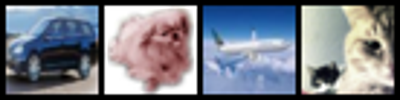

In [46]:
dataiter = iter(trainloader)
images, labels = dataiter.next() # 返回4张图片及标签
print(' '.join('%11s'%classes[labels[j]] for j in range(4)))
show(tv.utils.make_grid((images+1)/2)).resize((400,100))